# Mnist via keras
## Author: Wu Yuxiang
                     - Hunan Argriculture University AI Research

## Setup

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

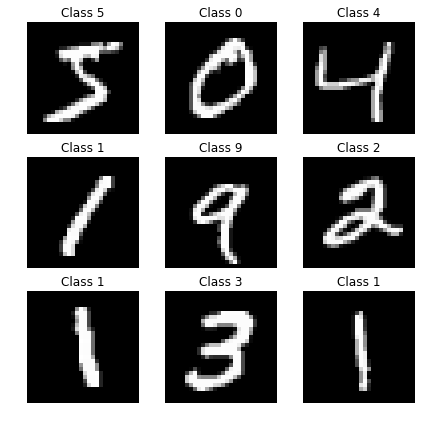

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the y to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [7]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="figure.png" />

In [8]:
# 1. Create network sequence

# 2. Create a fully connective layer - input.shape = [785, ], output.shape = [512]

# 3. Create an activation layer - ReLU

# 4. Create a dropout layer(0.2) - it helps protect the model from memorizing or "overfitting" the training data                       

# 5. Create a fully connective layer - output.shape = [512]

# 6. Create an activation layer - ReLU

# 7. Create a dropout layer(0.2)

# 8. Create a fully connective layer - output.shape = [num_classes]

# 9. Score Function - Softmax

print('Sequence compeleted...')

## Compile the model

In [9]:
model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [10]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 15s 254us/step - loss: 0.2875 - acc: 0.9119 - val_loss: 0.1126 - val_acc: 0.9661
Epoch 2/4
60000/60000 [==============================] - 15s 251us/step - loss: 0.1153 - acc: 0.9645 - val_loss: 0.0973 - val_acc: 0.9683
Epoch 3/4
60000/60000 [==============================] - 15s 245us/step - loss: 0.0804 - acc: 0.9752 - val_loss: 0.0678 - val_acc: 0.9783
Epoch 4/4
60000/60000 [==============================] - 15s 248us/step - loss: 0.0630 - acc: 0.9798 - val_loss: 0.0751 - val_acc: 0.9756


## Finally, evaluate its performance

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9756


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [13]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


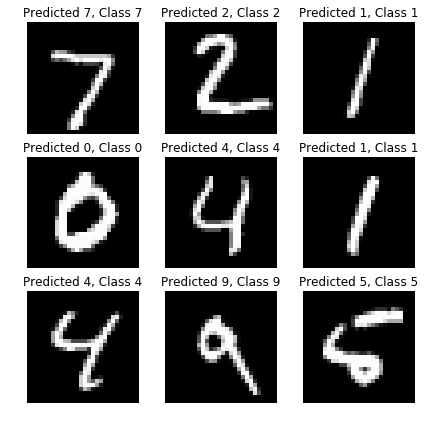

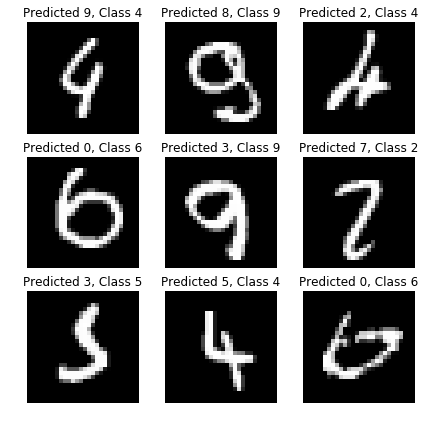

In [14]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# Thank you